In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles

# The Particles class

We could use it to handle the particle information.

The class contains several properties, including tag, mass, position, velocity, acceleration, and time.

For our own convenience, we want to the below data type to handle the N-body simulation:

In [2]:
time          = 0    # the starting  time
num_particles = 100  # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)

Note that, the mass is setting to a Nx1 martrix.\
The reason to use Nx1 matrix but not a numpy array is because mass x velcoity is the momentum\
and only Nx1 matrix could multiple with an Nx3 matrix. 

We hope that could initialze particles by typing the below code.\
The particle class with prepare empty arrays and matrix for later on setup.

In [3]:
particles = Particles(N=num_particles)

The `Particles` class should handle the below APIs to setup particles

In [4]:
particles.set_masses(masses=masses)
particles.set_positions(positions=positions)
particles.set_velocities(velocities=velocities)
particles.set_accelerations(accelerations=accelerations)
particles.set_tags(tags=tags)

#把數據傳到class

The `Particles` class should have the below APIs to get particle properties.

In [5]:
tags_check          = particles.get_tags()
masses        = particles.get_masses()
positions     = particles.get_positions()
velocities    = particles.get_velocities()
accelerations = particles.get_accelerations()

#check class getter
print(tags_check==tags)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


We could also dump the particle information into a text file.

In [6]:
particles.output(fn="data_particles.txt",time=time)

The saved data could be loaded by `numpy.loadtxt`.

In [7]:
t,m,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt("data_particles.txt")

## Exercise 1.

Implement the `Particles` class in `nbody.py`\
make sure your `Particles` can handle all above functions correctly.

## Exercie 2.

Once you have the `Particles` class implmented correctly.\
You should be able to use it to initialzie arbitry distribution of N particles.

(1) Initialize two particles that describe the Sun-Earth binary system.

(2) Initialize a 3D particle clould with N particles in a normal distrbuiotn (sigma=1) and total mass equal to 10.

Hints: use `numpy.random.randn` (see https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

In [8]:
# TODO:
from os import sep

def initial_SolarSystem(N=2):

    if not N == 2 :
        print("Error")
        quit()
    
    msun   = 1.989e33   # gram
    mearth = 5.97219e27 # gram
    G      = 6.67e-8   # cgs
    seperation    = 1.496e13   # cm
    period = np.sqrt(4 * np.pi**2 * seperation**3/(G*(msun+mearth)))
    xsun = -mearth/(msun+mearth)*seperation
    xearth = msun/(msun+mearth)*seperation
    vsun = 2*np.pi*xsun/period
    vearth =  -2*np.pi*xearth/period
    force = G*msun*mearth/seperation
    asun = force / msun
    aearth = force / mearth
    
    #some B.C of solar system
    particles = Particles (N=N)
    masses = particles.get_masses()
    masses[0,0] = msun
    masses[1,0] = mearth

    positions = particles.get_positions()
    positions[0,0] = xsun
    positions[1,0] = xearth

    velocities = particles.get_velocities()
    velocities[0,1] = vsun
    velocities[1,1] = vearth

    accelerations = particles.get_accelerations()
    accelerations[0,0] = asun
    accelerations[1,0] = aearth

    particles.set_masses(masses)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    return particles

In [9]:
np.random.randn(10,3)

array([[-1.5039458 ,  0.00691032,  0.00935318],
       [-1.72435466, -0.9495114 ,  1.07635843],
       [-0.42830164,  0.68679772,  0.05520975],
       [ 0.73573707,  1.50759995, -1.14327075],
       [-1.78101172,  0.10240411,  1.29376152],
       [-1.39780014, -2.63438261, -0.27238441],
       [ 1.42419457,  0.0644123 , -0.70847743],
       [ 1.61685221, -1.26156075,  0.42925082],
       [-1.41840031, -1.3020997 ,  0.69260341],
       [ 0.05959849,  1.07936715,  0.24638295]])

In [10]:
# TODO:
def initial_NormalDistribution(N=1, total_mass=10, amp=1 , sigma=1):
    particles = Particles(N)
    masses = particles.get_masses()
    mass = total_mass/particles.nparticles
    particles.set_masses((masses*mass))
    positions = np.random.randn(N,3)
    velocities = np.random.randn(N,3)
    accelerations = np.random.randn(N,3)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    return particles

### Visualzie your particles

Please visualzie the particles you asigned in the previous exercise. 

(a) Make a 2D projected plot on the x-y plane. 

(b) Make a 3D distribution of your particles.

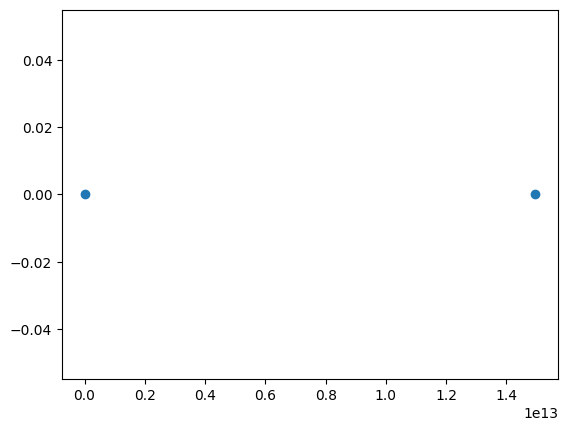

In [11]:
#TODO: visualzie your particles
particles_solar = initial_SolarSystem()
positions = particles_solar.get_positions()
plt.figure(1)
plt.scatter(positions[:,0],positions[:,1])

/var/folders/l2/5pc_8lzn0v1f7vtm4p89k28m0000gn/T/ipykernel_4797/2860157350.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


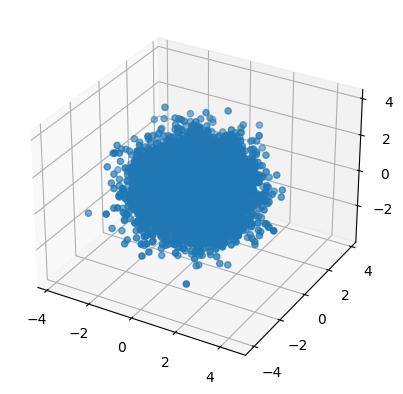

In [12]:
particles_cloud = initial_NormalDistribution(N=10000)
pos = particles_cloud.get_positions() #why
fig = plt.figure(1)
ax = fig.gca(projection='3d')
ax.scatter(pos[:,0],pos[:,1],pos[:,2])

## Use `@property` 

We could actually use python's `@property` to replace the getter and setter in `Particles` class.\

For example,

In [13]:
class foo:
    def __init__(self):
        self._x = 0
        return
    def get_x(self):
        return self._x
    def set_x(self, value):
        self._x = value
        return

In [14]:
a = foo()
a.x = 3
value = a.x
print(value)

3


The above code is equivalent to

In [15]:
class foo2:
    def __init__(self):
        self._x = 0
        return
    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, value):
        self._x = value
        return

In [16]:
a = foo2()
a.x = 3
value = a.x
print(value)

3
